In [2]:
import numpy as np
import pylab as plt
from collections import Counter
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
from pyabc.examples import tuberculosis
import pyabc.prior
from pyabc.plots import plot_marginals, plot_particles, plot_pairs
%matplotlib notebook

## Intractable model by Tanaka et al. 2006 for spread of tuberculosis

![](img/transmission_process.png)

### model parameter
$\alpha$: rate with which each infectious host randomly infects other individuals from an unlimited supply of hosts

$\delta$: rate with which a host stops being infectious, either by recovering or dying

$\tau$: rate with which the pathogen of the host mutates randomly within the host, generating a novel haplotype under a single-locus infinite alleles model

$\theta = (\alpha, \delta, \tau)$

$y_{\theta} = (6,3,2,2,1,1,1,1,1,1,1)$: output, vector of clusters, that is different haplotypes. Each number represents the infectious hosts for this particular haplotype

### Observation
$\alpha = 0.2, \delta = 0, \tau = 0.198, m = 20$

assume, that $\delta, \tau$ are known and apply uniform prior

In [3]:
alpha = 0.2
delta = 0
tau = 0.198
m = 20
N = 2e7

prior_alpha = pyabc.Prior("uniform", 0.005, 2, name=r"$\alpha$")
#prior_tau = pyabc.Prior("uniform", 0.01, 1, name="$\tau$")

list_of_priors = [prior_alpha]

simulator = tuberculosis.simulator

In [4]:
%timeit simulator(alpha)

3.39 ms ± 104 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
# for i in range(100):
#     params = [prior_alpha.sample(),prior_delta.sample(),prior_tau.sample()]
#     y0 = simulator(*params)

params = [alpha, tau, delta]



y0 = np.array([6,3,2,2,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]) # from paper

In [42]:
y0 = simulator(*params)
y0

array([3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

T1
0.55
T2
0.85


<IPython.core.display.Javascript object>


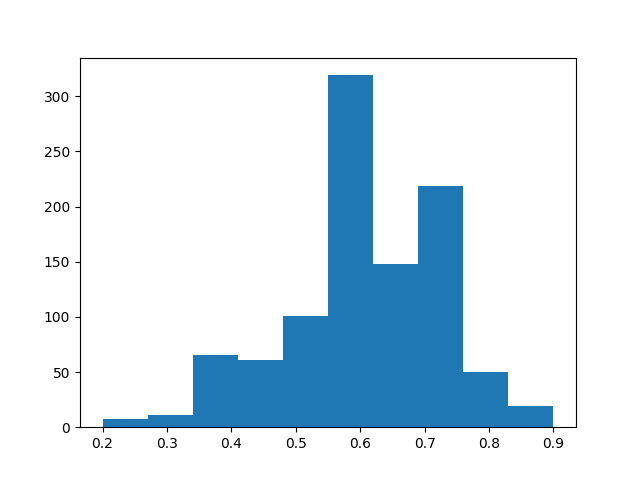

(array([   7.,   11.,   65.,   61.,  101.,  319.,  148.,  219.,   50.,   19.]),
 array([ 0.2 ,  0.27,  0.34,  0.41,  0.48,  0.55,  0.62,  0.69,  0.76,
         0.83,  0.9 ]),
 <a list of 10 Patch objects>)

In [8]:
list_of_sum = tuberculosis.summaries
for f in list_of_sum:
    print(f.__name__)
    print(f(y0))
    
#summaries = tuberculosis.summaries
T = []
for i in range(1000):
    y = simulator(alpha)
    T.append(list_of_sum[0](y))
    
plt.hist(T)

### ABC with summary stats

In [9]:
summaries = [lambda x: x]
rej = pyabc.RejectionSampler(priors=list_of_priors, simulator=simulator, 
                             summaries=summaries,
                             observation=y0, seed = 1337, verbosity=1)
smc = pyabc.SMCSampler(priors=list_of_priors, simulator=simulator, 
                             summaries=summaries,
                             observation=y0, seed = 1337)
mcmc = pyabc.MCMCSampler(priors=list_of_priors, simulator=simulator, 
                             summaries=summaries,
                             observation=y0, seed = 1337)
abcde = pyabc.ABCDESampler(priors=list_of_priors, simulator=simulator, 
                             summaries=summaries,
                             observation=y0, seed = 1337)

In [10]:
rej.sample(nr_samples=10000, threshold=2)

Rejection sampler started with threshold: 2 and number of samples: 10000
Samples:  10000 - Threshold: 2.0000 - Iterations:     203000 - Acceptance rate: 0.049261 - Time:   638.87 s


In [12]:
smc.sample(nr_samples=10000, thresholds=np.linspace(4, 2, 3))

SMC sampler started with thresholds: [ 4.  3.  2.] and number of samples: 10000
Iteration 0 completed
starting iteration[ 1 ]
Iteration 1 completed
starting iteration[ 2 ]
Iteration 2 completed
Samples:  10000 - Thresholds: 2.00 - Iterations:     156156 - Acceptance rate: 0.064039 - Time:   693.76 s


In [13]:
mcmc.sample(nr_samples=10000, threshold=2, step_size = [0.1])

MCMC sampler started with threshold: 2 and number of samples: 10000
Samples:  10000 - Threshold: 2.0000 - Iterations:      74148 - Acceptance rate: 0.134865 - Time:   419.35 s


<IPython.core.display.Javascript object>


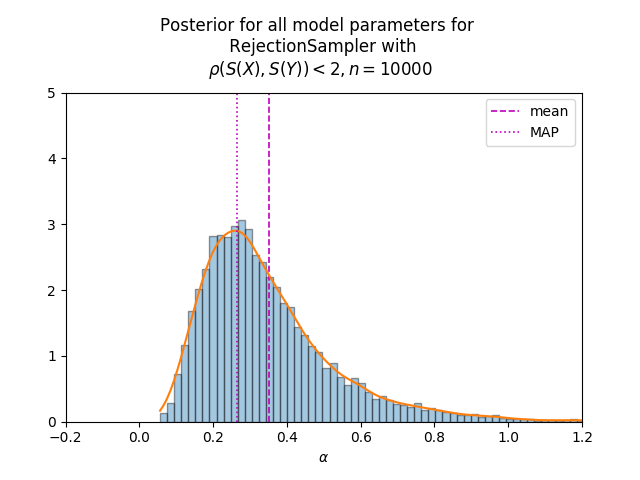

<IPython.core.display.Javascript object>


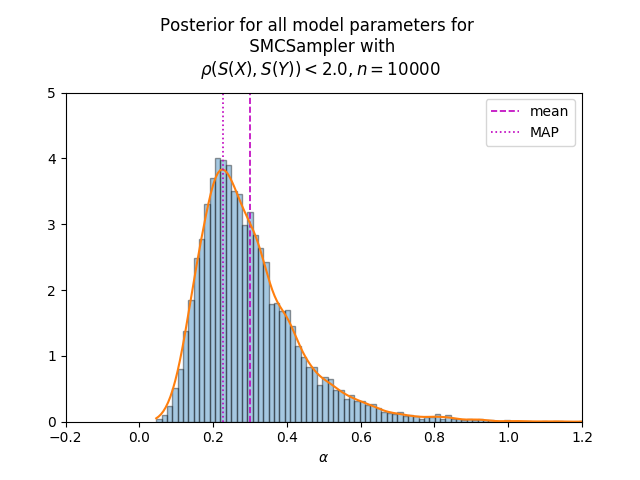

<IPython.core.display.Javascript object>


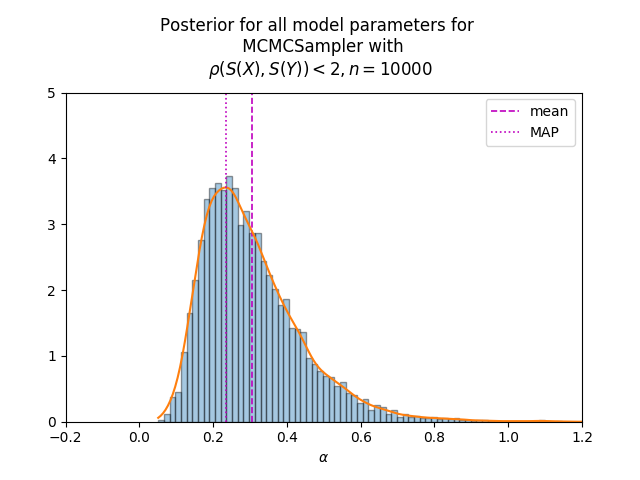

In [14]:
fig = plot_marginals(rej, kde=True, normed=True, xlim=[[-0.2, 1.2]], ylim=[0, 5])
fig = plot_marginals(smc, kde=True, normed=True, xlim=[[-0.2, 1.2]], ylim=[0, 5])
fig = plot_marginals(mcmc, kde=True, normed=True, xlim=[[-0.2, 1.2]], ylim=[0, 5])
#fig = plot_marginals(abcde, kde=True, normed=True)
#plot_marginals(bolfi, kde=True, normed=True)

## Influence of Summary Stats

In [81]:
T_1, T_2 = tuberculosis.summaries

In [82]:
T_1(y0)

0.55

In [83]:
T_2(y0)

0.84999999999999998

## T1 

In [7]:
T_1, T_2 = tuberculosis.summaries
rej = pyabc.RejectionSampler(priors=list_of_priors, simulator=simulator, 
                             summaries=[T_1],
                             observation=y0, seed = 1337, verbosity=1)
smc = pyabc.SMCSampler(priors=list_of_priors, simulator=simulator, 
                             summaries=[T_1],
                             observation=y0, seed = 1337)
mcmc = pyabc.MCMCSampler(priors=list_of_priors, simulator=simulator, 
                         summaries=[T_1], 
                         observation=y0, seed = 1337)

MCMC sampler started with threshold: 0.2 and number of samples: 10000
Samples:  10000 - Threshold: 0.2000 - Iterations:      21128 - Acceptance rate: 0.473306 - Time:    87.79 s


<IPython.core.display.Javascript object>


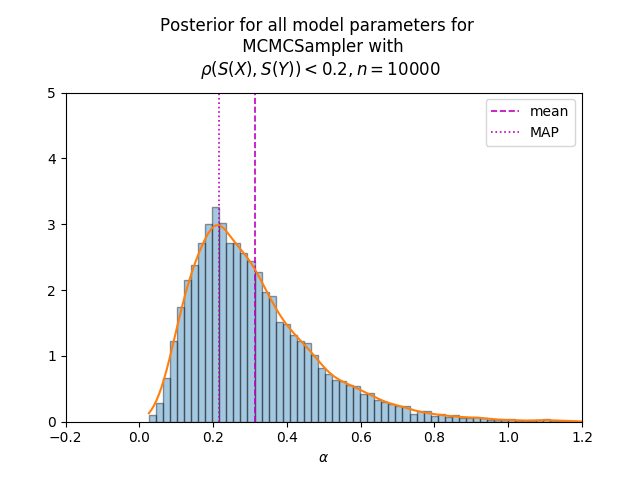

MCMC sampler started with threshold: 0.1 and number of samples: 10000
Samples:  10000 - Threshold: 0.1000 - Iterations:      37625 - Acceptance rate: 0.265781 - Time:   179.76 s


<IPython.core.display.Javascript object>


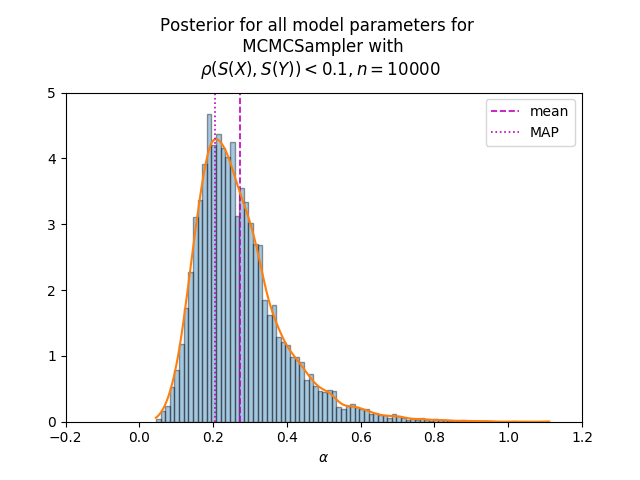

MCMC sampler started with threshold: 0.05 and number of samples: 10000
Samples:  10000 - Threshold: 0.0500 - Iterations:      73183 - Acceptance rate: 0.136644 - Time:   345.98 s


<IPython.core.display.Javascript object>


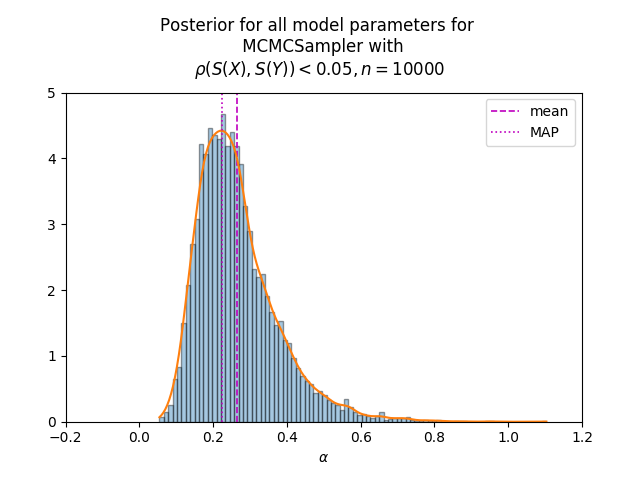

In [12]:
mcmc.sample(nr_samples=10000, threshold=0.2, step_size = [0.1])
fig = plot_marginals(mcmc, kde=True, normed=True, xlim=[[-0.2, 1.2]], ylim=[0, 5])

mcmc.sample(nr_samples=10000, threshold=0.1, step_size = [0.1])
fig = plot_marginals(mcmc, kde=True, normed=True, xlim=[[-0.2, 1.2]], ylim=[0, 5])

mcmc.sample(nr_samples=10000, threshold=0.05, step_size = [0.1])
fig = plot_marginals(mcmc, kde=True, normed=True, xlim=[[-0.2, 1.2]], ylim=[0, 5])

## T2

In [13]:
T_1, T_2 = tuberculosis.summaries
rej = pyabc.RejectionSampler(priors=list_of_priors, simulator=simulator, 
                             summaries=[T_2],
                             observation=y0, seed = 1337, verbosity=1)
smc = pyabc.SMCSampler(priors=list_of_priors, simulator=simulator, 
                             summaries=[T_2],
                             observation=y0, seed = 1337)
mcmc = pyabc.MCMCSampler(priors=list_of_priors, simulator=simulator, 
                         summaries=[T_2], 
                         observation=y0, seed = 1337)

MCMC sampler started with threshold: 0.2 and number of samples: 10000
Samples:  10000 - Threshold: 0.2000 - Iterations:      15219 - Acceptance rate: 0.657073 - Time:    71.90 s


<IPython.core.display.Javascript object>


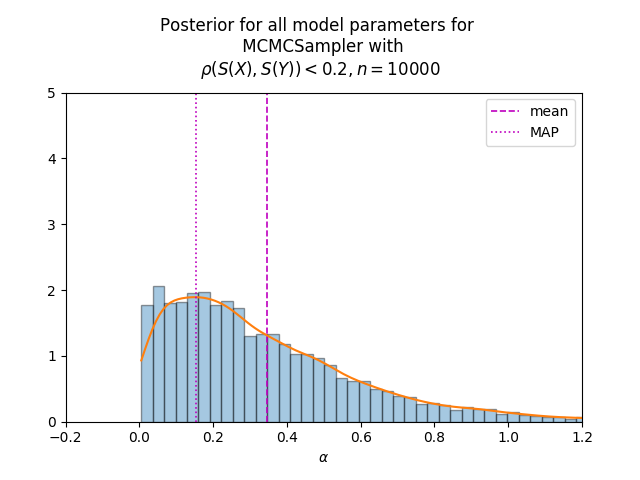

MCMC sampler started with threshold: 0.1 and number of samples: 10000
Samples:  10000 - Threshold: 0.1000 - Iterations:      15918 - Acceptance rate: 0.628220 - Time:    85.50 s


<IPython.core.display.Javascript object>


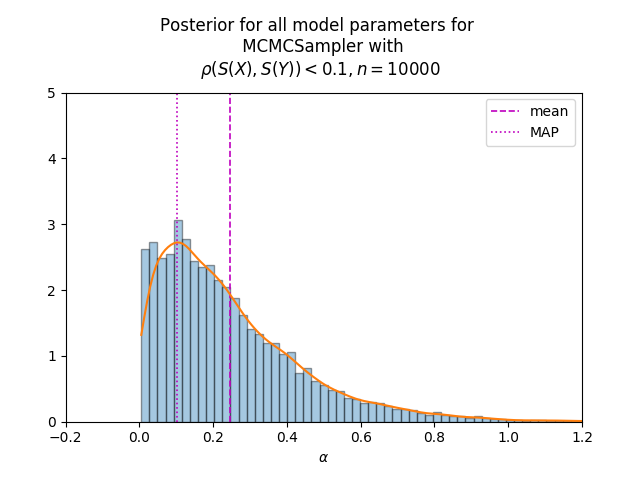

MCMC sampler started with threshold: 0.05 and number of samples: 10000
Samples:  10000 - Threshold: 0.0500 - Iterations:      36017 - Acceptance rate: 0.277647 - Time:   176.60 s


<IPython.core.display.Javascript object>


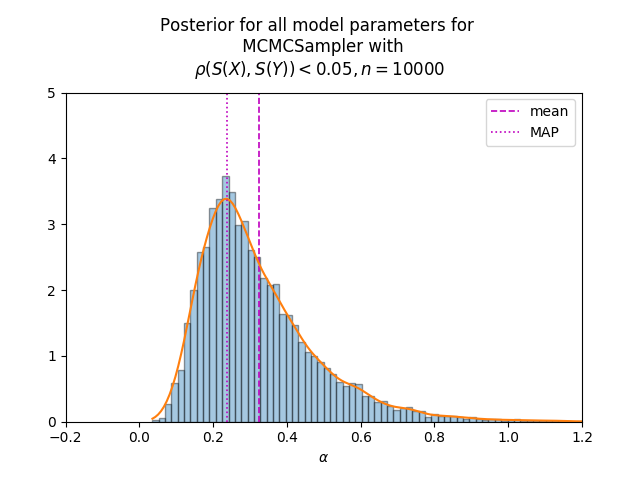

In [14]:
mcmc.sample(nr_samples=10000, threshold=0.2, step_size = [0.1])
fig = plot_marginals(mcmc, kde=True, normed=True, xlim=[[-0.2, 1.2]], ylim=[0, 5])

mcmc.sample(nr_samples=10000, threshold=0.1, step_size = [0.1])
fig = plot_marginals(mcmc, kde=True, normed=True, xlim=[[-0.2, 1.2]], ylim=[0, 5])

mcmc.sample(nr_samples=10000, threshold=0.05, step_size = [0.1])
fig = plot_marginals(mcmc, kde=True, normed=True, xlim=[[-0.2, 1.2]], ylim=[0, 5])